# **Optimization**

* Now that we have understood several variants of gradient descent algorithm. In this section, we will understand how can we use them in finding the optimal parameters of simple linear regression.
* The equation of a simple linear regression can be expressed as:

$$ \hat{y} = mx + b (1) $$
* Thus, we have two parameters $m$ and $b$. We will see how can we use gradient descent and find the optimal values for these two parameters $m$ and $b$.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt

### **1. Prepare the Dataset**
* We generate some random data points with 500 rows and 2 columns (x and y) and use for training:
* `First column indicates the $x$ value` & `Second column indicates the $y$ value`

In [2]:
data = np.random.randn(500, 2)
theta = np.zeros(2)

* We know that equation of a simple linear regression is expressed as:

$$ \hat{y} = mx + b  $$

* Thus, we have two parameters $m$ and $b$.  We store both of these parameter $m$ and $b$ in an `array called theta`. First, we initialize theta with zeros as shown below:

### **2. Loss Function**
* Mean Squared Error (MSE) of Regression is given as:
$$J=\frac{1}{N} \sum_{i=1}^{N}(y-\hat{y})^{2}(2) $$
* Where $N$ is the number of training samples, $y$ is the actual value and $\hat{y}$ is the predicted value.
* The above loss function can be implemented as: We feed the data and the model parameter theta to the loss function which returns the MSE.
>Remember: data[,0] has $x$ value and data[,1] has $y$ value. Similarly, theta [0] has a value of $m$ and theta[1] has a value of $b$.

**Gradient of Loss Function**


Gradients of loss function $J$ with respect to parameter $m$ is given as:


$$ \frac{d J}{d m}=\frac{2}{N} \sum_{i=1}^{N}-x_{i}\left(y_{i}-\left(m x_{i}+b\right)\right) (3)$$


Gradients of loss function $J$ with respect to parameter $b$ is given as:
$$ \frac{d J}{d b}=\frac{2}{N} \sum_{i=1}^{N}-\left(y_{i}-\left(m x_{i}+b\right)\right) (4)$$

We define a function called compute_gradients which takes the data and parameter theta as an input and returns the computed gradients:

In [5]:
def loss_function(data,theta):
  # get m and b
  m = theta[0]
  b = theta[1]
  loss = 0

  # on each data point (SGD)
  for i in range(0, len(data)):

      # get x and y
      x = data[i, 0]
      y = data[i, 1]

      # predict the value of y
      y_hat = (m*x + b)

      # compute loss as given in quation (2)
      loss = loss+((y-(y_hat))**2)

  # MSE: mean sqaured loss
  mean_squared_loss = loss/float(len(data))

  return mean_squared_loss

def compute_gradients(data, theta):
  gradients = np.zeros(2)

  # total number of data points
  N = float(len(data))

  m = theta[0]
  b = theta[1]

  # for each data point
  for i in range(len(data)):
      x = data[i, 0]
      y = data[i, 1]

      # gradient of loss function with respect to m as given in (3)
      gradients[0] += -(2/N)*x*(y-((m*x)+b))

      # gradient of loss funcction with respect to b as given in (4)
      gradients[1] += -(2/N)*(y-((theta[0]*x)+b))

  # add epsilon to avoid division by zero error
  epsilon = 1e-6
  gradients = np.divide(gradients, N + epsilon) # gradients/(N+epsilon)

  return gradients

>**Note:**
* When we feed the randomly initialized data and model parameter theta, the compute_gradients function returns the gradients of $m$: $\frac{d J}{d m}$ and gradients of $b$: $\frac{d J}{d b}$.


### **3. Update Rule**
* After computing gradients we need to update our model parameter according to our update rule as given below:
* Update m:
$$m=m-\alpha \frac{d J}{d m} (5) $$
* Update b:
$$ b=b-\alpha \frac{d J}{d b} (6) $$
* Since we stored $m$ in theta[0] and $b$ in theta[1], we can write our update equation as:
$$\theta = \theta - \alpha \frac{dJ}{d\theta} (7)$$
* As we learned in the previous section, updating gradients for just one time will not lead us to the convergence(sự hội tụ) i.e minimum of the cost function, so we need to compute gradients and the update the model parameter for `several iterations`:


In [6]:
## Update Rule
theta = np.zeros(2)
gr_loss=[]

# Thực hiện cập nhật 50000 lần m và c
# Mỗi lần cập nhật, loss được tính trên toàn bộ data
for t in range(50000):
  # compute gradients
  gradients = compute_gradients(data, theta)

  # update parameter
  # theta chứa m và c nên có thể viết ngắn gọn cập nhật theta để cập nhật cùng lúc cả m lẫn c
  theta = theta-(1e-2*gradients)

  # store the loss
  gr_loss.append(loss_function(data,theta))

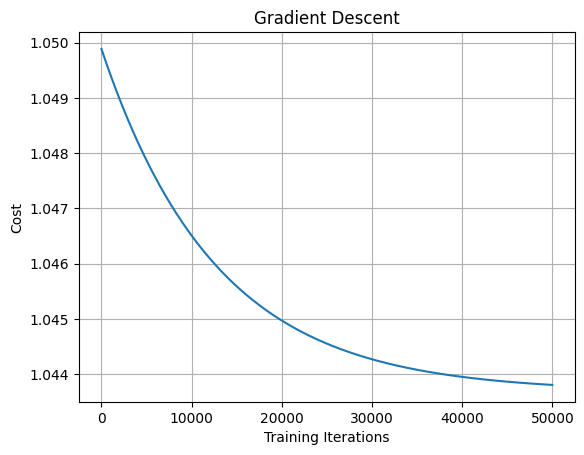

In [7]:
plt.plot(gr_loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

>**Note:**
* Với Gradient Descent loss vẫn giảm qua từng lần cập nhật weights, tuy nhiên loss giảm rất chậm.
* Nếu model và số lượng sample lớn, sẽ tiêu tốn nhiều thời gian training và thời gian training.

### **4. Mini Batch Gradient Descent**
We will be using the previously definedd function to calculate the loss,gradient and update the parameter.

In [27]:
# Thực hiện cập nhật m và c 5000 lần.

def minibatch(data, theta, lr=1e-2, minibatch_ratio=0.01,
              num_iterations=5000):
  loss=[]
  minibatch_size = int(math.ceil(len(data)*minibatch_ratio))  # Tính ra số lượng sample trong 1 minibatch.
                                                              # math.ceil(x) làm tròn lên số nguyên nhỏ nhất nhưng không nhỏ hơn x

  for i in range(num_iterations):
    sample_size = random.sample(range(len(data)), minibatch_size) # Lấy ra số lượng sample trong 1 minibatch trong data
    np.random.shuffle(data)

    # Sample batch of data
    sample_data = data[0:sample_size[0], :]

    # Compute gradients
    grad = compute_gradients(sample_data, theta)

    # Update parameters
    theta = theta-(lr*grad)

    loss.append(loss_function(data, theta))

  return loss

In [33]:
theta = np.zeros(2)
mini_loss = minibatch(data, theta)

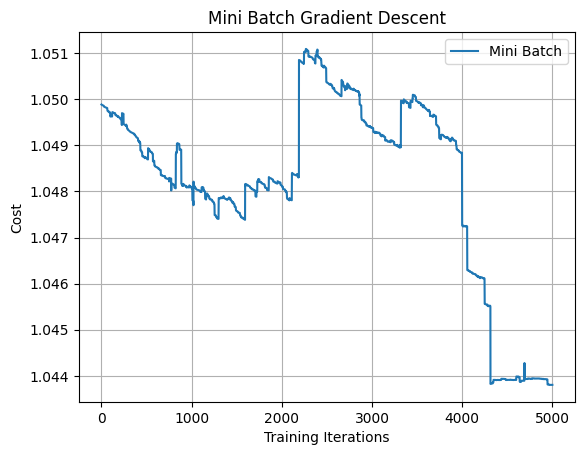

In [34]:
plt.plot(mini_loss, label='Mini Batch')
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Mini Batch Gradient Descent')
plt.show()

>**Note:**
* Sau 5000 lần cập nhật theta (5000 iteration) loss tuy có giảm nhưng trong quá trình này loss giao động rất mạnh, tăng giảm liên tục.
* ==> Chưa hiệu quả.

### **5. Gradient descent with Momentum**
We learned how momentum helps us to reduce oscillations in the gradient steps and attain the convergence faster. The update equation of momentum is given as:

$$v_t = \gamma v_{t-1} + \eta \nabla_\theta J( \theta) (8) $$

Update theta by:
$${\theta = \theta - v_t }  (9) $$

In [36]:
def Momentum(data, theta, lr=1e-2, gamma=0.9, num_iterations=5000):
  loss=[]

  # Initialize vt with zeros (theta [0]: m  and theta[1]: b)
  vt = np.zeros(theta.shape[0])

  for t in range(num_iterations):
    # Compute gradients with respect to theta
    gradients = compute_gradients(data, theta)

    # Update vt by equation (8)
    vt = gamma*vt + lr*gradients

    # Update model parameter theta by equation (9)
    theta = theta-vt

    # Store loss of every iteration
    loss.append(loss_function(data, theta))

  return loss

In [37]:
theta = np.zeros(2)
momentum_loss = Momentum(data, theta)

Text(0.5, 1.0, 'Momentum')

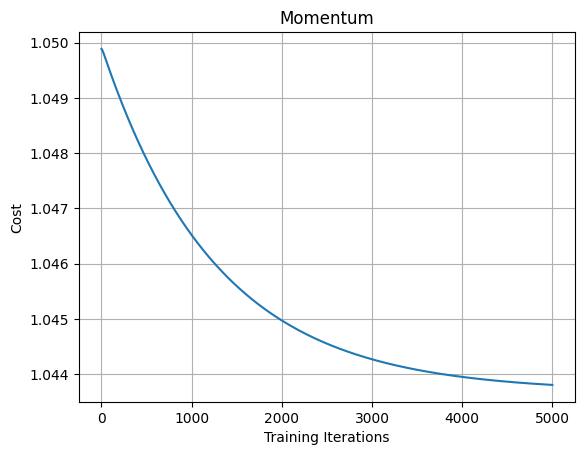

In [38]:
plt.plot(momentum_loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Momentum')

>**Note:**
* `Gradient descent with Momentum` hiệu quả hơn cả `Gradient descent` lẫn `MiniBatch Gradient descent`.
* `Gradient descent with Momentum` hội tụ nhanh hơn rất nhiều so với `Gradient descent`.
* `Gradient descent with Momentum` có loss giảm đều, không bị giao động nhiều như `MiniBatch Gradient descent`.

In [42]:
c = np.zeros(2)
v = np.zeros(c.shape[0])

print(c)
print(v)

[0. 0.]
[0. 0.]


### **6. So sánh Gradient Descent, Mini BatchGradient Descent và Gradient Descent with Momentum**

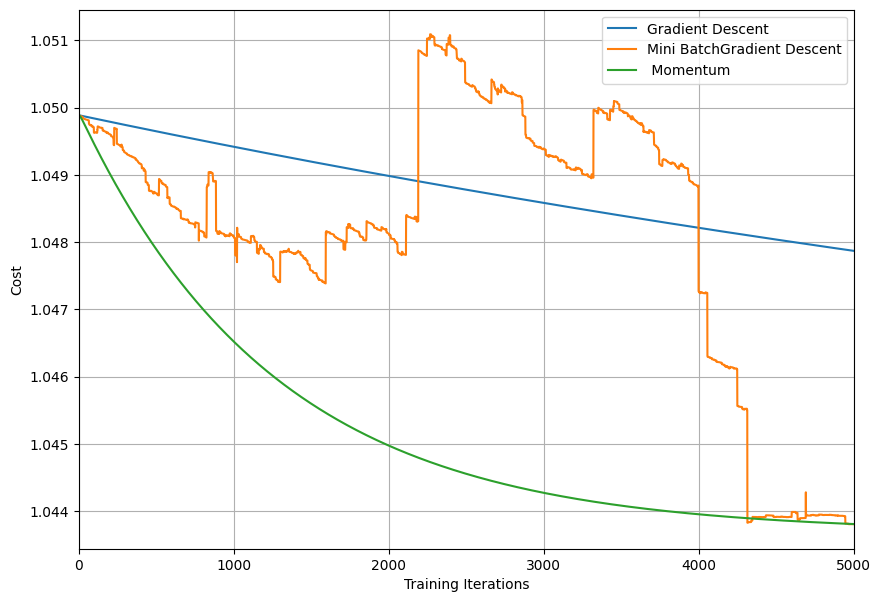

In [43]:
plt.figure(figsize=(10,7))
plt.plot(gr_loss, label='Gradient Descent')
plt.plot(mini_loss, label='Mini BatchGradient Descent')
plt.plot(momentum_loss, label=' Momentum')

plt.xlim(0,5000)
plt.grid()
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.show()

### **7. AdaGrad**

* In a nutshell, in AdaGrad, we `set the learning rate to a small value when past gradients value is high` and `to a high value when the past gradient value is less`(Learning Rate sẽ thay đổi trong từng giai đoạn). So our learning rate
value changes according to the past gradients updates of the parameter. (Refer the section AdaGrad in the book for a detailed explanation)
* The update equation of Adagrad is given as:

$${\theta_{t}^i = \theta_{t-1}^i - \dfrac{\eta}{\sqrt{ \sum_{\tau=1}^t (g_{\tau}^i)^2   + \epsilon}} \cdot g_{t}^i } (12) $$

In [45]:
def AdaGrad(data, theta, lr=1e-2, epsilon=1e-8, num_iterations=180):
  loss=[]
  # initialize gradients_sum for storing sum of gradients
  gradients_sum = np.zeros(theta.shape[0])

  for t in range(num_iterations):
    # Compute gradients with respect to theta
    gradients = compute_gradients(data, theta)

    # Compute square of sum of gradients
    gradients_sum += gradients**2

    # Updata gradients
    gradient_update = gradients/(np.sqrt(gradients_sum + epsilon))

    # Update model parameter according to equation (12)
    theta = theta-(lr*gradient_update)

    loss.append(loss_function(data, theta))

  return loss

In [46]:
theta = np.zeros(2)
adagrad_loss = AdaGrad(data, theta)

Text(0, 0.5, 'Cost')

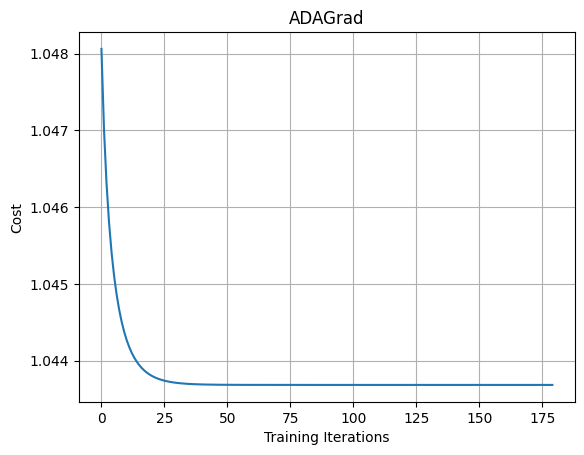

In [47]:
plt.plot(adagrad_loss)
plt.grid()
plt.title('ADAGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

>**Note:**
* AdaGrad hội tụ nhanh hơn rất nhiều so với Gradient Descent with Momentum.
* Chưa tới 30 iteration model đã hội tụ.

### **8. Adadelta (Cần xem lại từ phần này)**
* With AdaDelta we completely get rid of learning rate. (Refer the section AdaDelta in the book for full explanation)
* The update equation of AdaDelta is expressed as:

Running average of gradients:
$$E\left[g^{2}\right]_{t}=\gamma E\left[g^{2}\right]_{t-1}+(1-\gamma) g_{t}^{2} (13) $$

Compute delta:
$$ \nabla \theta_{t}=-\frac{R M S[\Delta \theta]_{t-1}}{R M S\left[g_{t}\right]} \cdot g_{t}^{i} (14) $$

Running averge of parameter update:
$$ E\left[\Delta \theta^{2}\right]_{t}=\gamma E\left[\Delta \theta^{2}\right]_{t-1}+(1-\gamma) \Delta \theta_{t}^{2} (15) $$

Update theta:
$$ \theta_{t}^{i}=\theta_{t-1}^{i}+\nabla \theta_{t} (16) $$

In [48]:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5,num_iterations = 5000):

    loss = []

    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])

    #initialize running average of parameter update
    E_delta_theta2 = np.zeros(theta.shape[0])


    for t in range(num_iterations):

        #compute gradients of loss with respect to theta
        gradients = compute_gradients(data, theta)

        #compute running average of gradients as given in equation (13)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))

        #compute delta_theta as given in equation (14)
        delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 + epsilon)) * gradients

        #compute running average of parameter updates as given in equation (15)
        E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta ** 2))

        #update the model parameter, theta as given in equation (16)
        theta = theta + delta_theta

        #store  the loss
        loss.append(loss_function(data,theta))

    return loss

In [51]:
theta = np.zeros(2)
adadelta_loss = AdaDelta(data, theta)

Text(0, 0.5, 'Cost')

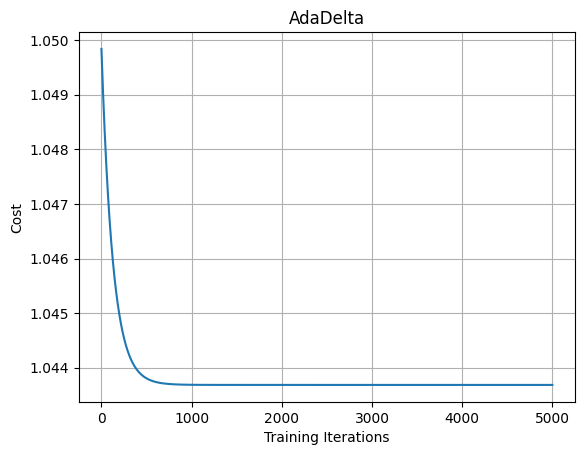

In [52]:
plt.plot(adadelta_loss)
plt.grid()
plt.title('AdaDelta')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

### **9. Adam - Adaptive Moment Estimation**
* Phương pháp được dùng phổ biến nhất trong thực tế.
* Check the section Adam in the book for the detailed explanation. The update equation of Adam is given as:

First moment estimate:
$$m_{t}=\beta_{1} m_{t-1}+\left(1-\beta_{1}\right) g_{t} (19) $$

Second moment estimate:
$$v_{t}=\beta_{2} v_{t-1}+\left(1-\beta_{2}\right) g_{t}^{2} (20)$$

Bias-corrected mt:
$$\hat{m}_{t}=\frac{m_{t}}{1-\beta_{1}^{t}} (21) $$

Bias-corrected vt:
$$\hat{v}_{t}=\frac{v_{t}}{1-\beta_{2}^{t}} (22) $$

Update theta:


In [53]:
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #update first moment mt as given in equation (19)
        mt = beta1 * mt + (1. - beta1) * gradients

        #update second moment vt as given in equation (20)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2

        #compute bias-corected estimate of mt (21)
        mt_hat = mt / (1. - beta1 ** (t+1))

        #compute bias-corrected estimate of vt (22)
        vt_hat = vt / (1. - beta2 ** (t+1))

        #update the model parameter as given in (23)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

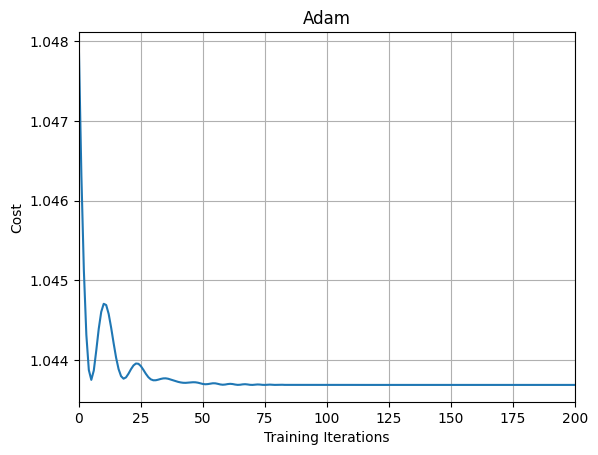

In [54]:
theta = np.zeros(2)
adam_loss = Adam(data, theta)

plt.plot(adam_loss)
plt.grid()
plt.xlim(0,200)
plt.title('Adam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

### **10. So sánh Adagrad, Adadelta, Adam**

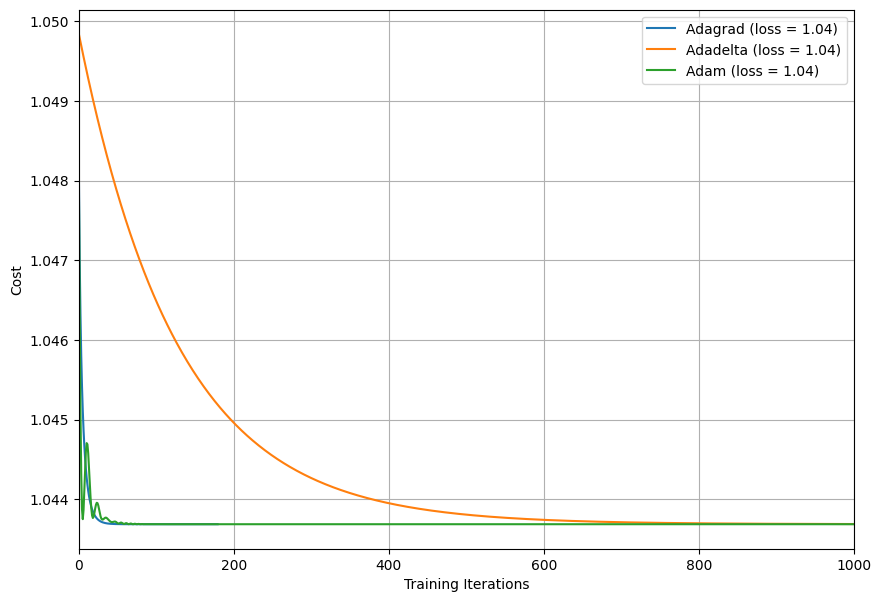

In [55]:
plt.figure(figsize=(10,7))
# plt.plot(gr_loss,label='Gradient Descent')
# plt.plot(mini_loss,label='Mini BatchGradient Descent')

# plt.plot(mom_loss,label=' Momemtum')

plt.plot(adagrad_loss,label='Adagrad (loss = %0.2f)' % (adagrad_loss[-1]))
plt.plot(adadelta_loss,label='Adadelta (loss = %0.2f)' % (adadelta_loss[-1]))
plt.plot(adam_loss,label='Adam (loss = %0.2f)' % (adam_loss[-1]))

plt.xlim(0,1000)
plt.grid()
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.show()

### **11. So sánh tất cả các phương pháp trên**

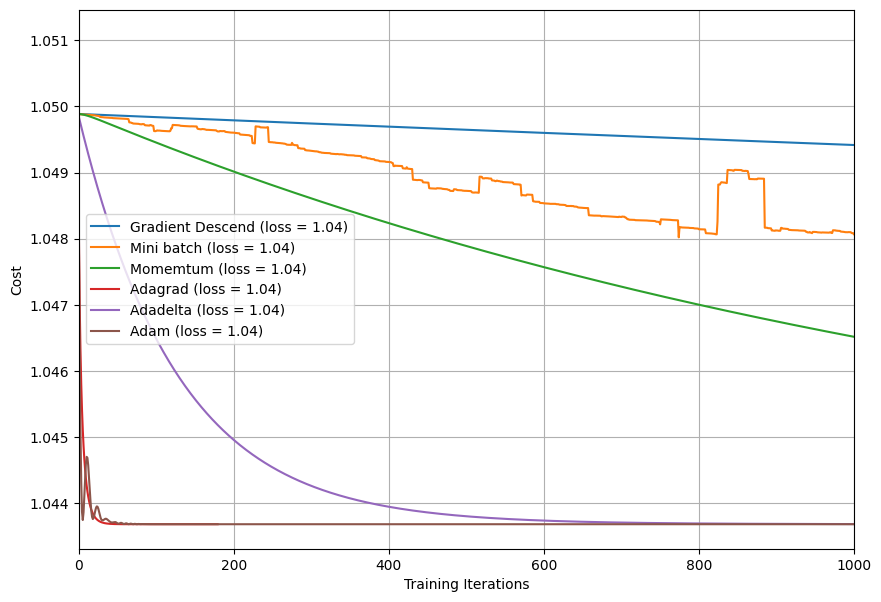

In [58]:
plt.figure(figsize=(10,7))
plt.plot(gr_loss,label='Gradient Descend (loss = %0.2f)' % (gr_loss[-1]))
plt.plot(mini_loss,label='Mini batch (loss = %0.2f)' % (mini_loss[-1]))

plt.plot(momentum_loss,label='Momemtum (loss = %0.2f)' % (momentum_loss[-1]))

plt.plot(adagrad_loss,label='Adagrad (loss = %0.2f)' % (adagrad_loss[-1]))
plt.plot(adadelta_loss,label='Adadelta (loss = %0.2f)' % (adadelta_loss[-1]))
plt.plot(adam_loss,label='Adam (loss = %0.2f)' % (adam_loss[-1]))

plt.xlim(0,1000)
plt.grid()
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.show()